# Dynamic Portfolio Allocation Model
This document is rightly owned by **Foo Melson**, an undergraduate in NUS Quantitative Finance and Finance

In the context of having $10m in capital requires careful consideration of the mode of investing. While the simple solution to answer that is to invest in a fund or an ETF with the required properties mentioned in the essay written, with the proper tools and skillsets, being able to manage you own portfolio provides personal oversight and responsibility of portfolio performance.

## Objectives
This model here aims to document and make investment decisions for a well diversified portfolio based on personal preferences of risk and growth outlook. This model will address

1. Data collection: Data structure, Back testing framework
2. Equities: Instrument selection, Black Litterman Model
3. Fixed income: Instrument selection, Modern Portfolio Theory
4. Performance measurement

## How the report is structured
1. Findings and results
2. Methodologies
3. Present day portfolio

# Findings and results
This section will contain a summary of the results of my models And the relevant highlights of my findings

## Present portfolio allocation (As of 2024/10/12)
##### Between Asset Classes

**15% cash - 40% equities - 45% fixed income instruments**

##### Within Equities

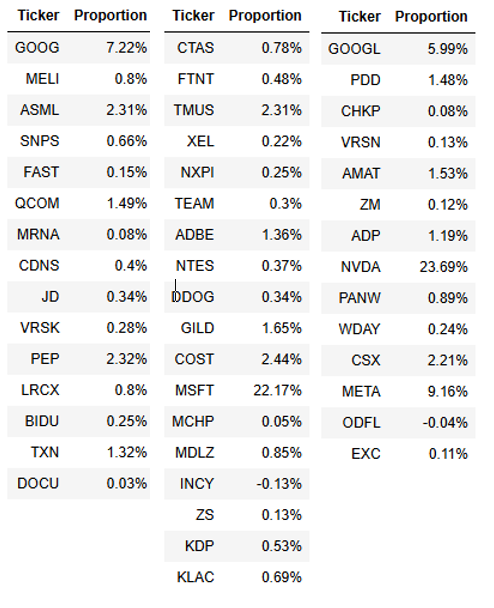

##### Within Fixed Income

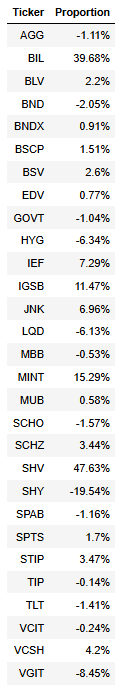

##### Quick breakdown of method

A 1 year historic data for equities and fixed income instruments were collected and stored under `equity_today.db` and `fixed_income_today.db`. These will serve as storage points for the data we will be usubg

PCA was used to remove overly correlated stocks through focusing of 5 PCA components. It typically reduced the stock sample to around 30-40

Then these stocks are utilised for benchmark proportions utilising the Black_litterman model. This will form the `Equities` component

Next, the modern portfolio theory was applied on bond etfs so as to optimise sharpe ratio based on a 1 year historic value analysis

Finally, on the basis of **15% cash - 40% equities - 45% fixed income instruments**, the weights of equities, fixed income and cash was distributed accordingly


## Historical portfolio allocations
### Year 2021 results based on model
##### Key performance metrics

The backtested portfolio had a low volatility while seeing positive returns, a positive indicator for the performance

| Metric                         | Value            |
|--------------------------------|------------------|
| Annualized Standard Deviation (Volatility) | 7.96% |
| Annualized Sharpe Ratio (without RFR) | 1.87 |
| Final Cumulative Return | 15.61% |
| Maximum 1-Month Drawdown | -4.10% |


The results of cumulative returns for the PCA, MPT, and Black-Litterman model across 2021

This back tested year saw positive returns amidst active equities market

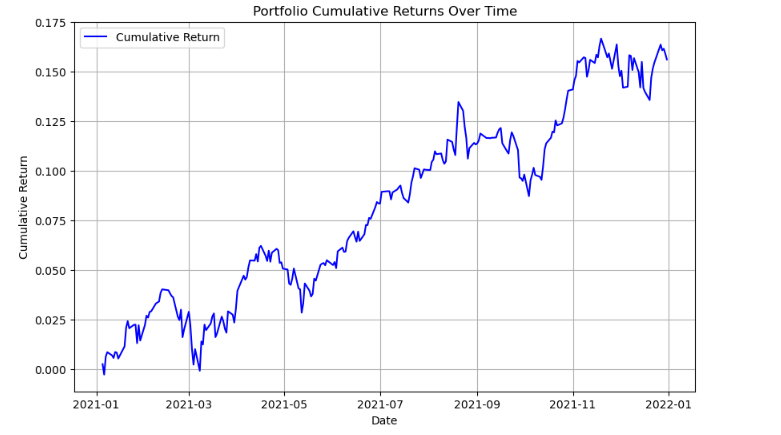

##### Overall allocation overtime

## Day 1 Allocations (Equity and Bond Constituents)

This graph shows the changes in the portfolio allocation over time, the changes of the values are not very drastic as with the stable nature of portfolio allocations

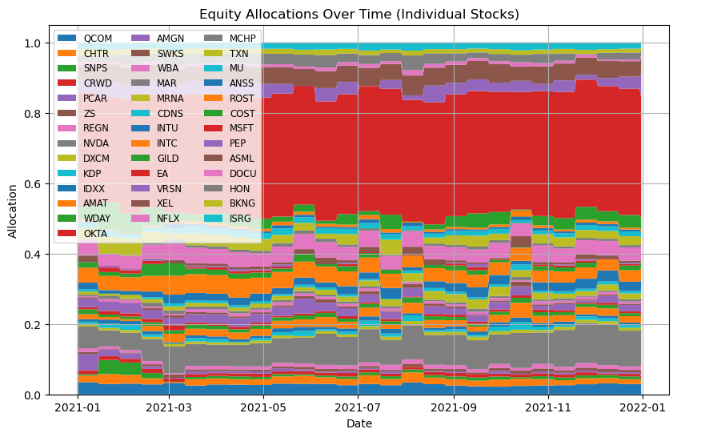

##### Within Equities on Day 1

| Ticker | Allocation (%) |
|--------|----------------|
| QCOM | 3.47% |
| CHTR | 1.85% |
| SNPS | 0.40% |
| CRWD | 1.13% |
| PCAR | 4.51% |
| ZS | 0.72% |
| REGN | 1.04% |
| NVDA | 6.14% |
| DXCM | 0.76% |
| KDP | 0.63% |
| IDXX | 0.70% |
| AMAT | 1.44% |
| WDAY | 1.36% |
| OKTA | 0.60% |
| AMGN | 2.42% |
| SWKS | 0.42% |
| WBA | 0.35% |
| MAR | 0.41% |
| MRNA | 0.86% |
| CDNS | 0.69% |
| INTU | 1.85% |
| INTC | 4.25% |
| GILD | 1.62% |
| EA | 0.39% |
| VRSN | -0.25% |
| XEL | 1.68% |
| NFLX | 4.43% |
| MCHP | 0.32% |
| TXN | 3.05% |
| MU | 1.54% |
| ANSS | 0.36% |
| ROST | 0.59% |
| COST | 3.83% |
| MSFT | 32.16% |
| PEP | 3.68% |
| ASML | 3.93% |
| DOCU | 1.02% |
| HON | 1.97% |
| BKNG | 1.83% |
| ISRG | 1.85% |

##### Within Fixed Income on Day 1

| Ticker | Allocation (%) |
|--------|----------------|
| AGG | 0.84% |
| BND | -2.54% |
| LQD | 0.68% |
| SCHZ | -0.49% |
| GOVT | -4.39% |
| VCIT | 2.06% |
| IEF | -11.88% |
| TIP | -0.74% |
| BIL | 37.20% |
| SHV | 28.98% |
| BSV | 7.54% |
| HYG | -0.53% |
| JNK | 0.43% |
| SHY | -1.47% |
| BLV | -1.21% |
| TLT | 1.75% |
| VCSH | -3.06% |
| MBB | 0.14% |
| SPAB | 2.06% |
| BSCP | -1.37% |
| STIP | 4.95% |
| BNDX | 1.55% |
| IGSB | -2.26% |
| SCHO | 26.99% |
| EDV | 0.62% |
| MINT | 7.96% |
| SPTS | -6.81% |
| VGIT | 12.46% |
| MUB | 0.52% |

## Methodologies
This section will primarily contain the due diligence of justifying my models and retaining the source code for populating my findings in portfolio allocation

### Data collection
A simplified approach with no encryption by populating interested tickers from NASDAQ into a database

In [ ]:
from sqlalchemy import create_engine, Column, Integer, String, Float, Date, text, inspect, Table, MetaData,inspect,Table
from sqlalchemy.orm import sessionmaker, declarative_base
import os
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf

'''
Helper functions
'''

import os
def isvalid_date(date_string):
    try:
        datetime.strptime(date_string, '%Y-%m-%d')
        return True
    except ValueError:
        return False
        
def isvalid_start_date(start_date, end_date):
    # Check if both dates are in the correct format
    if not isvalid_date(start_date) or not isvalid_date(end_date):
        return False
    
    start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
    end_date_obj = datetime.strptime(end_date, '%Y-%m-%d')
    today = datetime.now().date()
    
    # Check if start date is before today and one day before end date
    return start_date_obj.date() < today and start_date_obj + timedelta(days=1) <= end_date_obj
    
def isvalid_end_date(start_date, end_date):
    # Check if both dates are in the correct format
    if not isvalid_date(start_date) or not isvalid_date(end_date):
        return False
    
    start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
    end_date_obj = datetime.strptime(end_date, '%Y-%m-%d')
    today = datetime.now().date()
    
    # Check if end date is before today and one day after start date
    return end_date_obj.date() < today and end_date_obj >= start_date_obj + timedelta(days=1)

def valid_interval(interval):
    valid_intervals = ["1m", "2m", "5m", "15m", "30m", "60m", "90m", "1h", "1d", "5d", "1wk", "1mo", "3mo"]
    return interval in valid_intervals

def validate_engine_in_directory(engine_name):
    n = engine_name +".db"
    db_path = os.path.join(os.getcwd(), n)
    
    # Check if the file exists at the specified path
    return os.path.isfile(db_path)


'''
Helper functions
'''

engine = create_engine(f"sqlite:///equity.db")

def generate_ticker(d_start, d_end, interval, ticker="SPY"):
    d_start = pd.to_datetime(d_start)
    d_end = pd.to_datetime(d_end)
    
    df = pd.DataFrame()
    current_date = d_start
    stock_info = yf.Ticker(ticker)
    shares_outstanding = stock_info.info.get('sharesOutstanding', None)
    
    # Fetch data day-by-day
    df = yf.download(ticker, start=d_start.strftime('%Y-%m-%d'),end=d_end.strftime('%Y-%m-%d'), interval=interval)
    #df['Market Cap'] = df['Close'] * shares_outstanding

    df = df.reset_index()  # Reset the index to have a proper Date column
    df.rename(columns={'index': 'Date'}, inplace=True)
    
    return (df, ticker)


Base = declarative_base()
# Function to create a dynamic DataKeeper class with a custom table name
def create_data_keeper_class(table_name):
    # Dynamically create a class with the given table name "table_name"
    return type(
        table_name, 
        (Base,), 
        {
            '__tablename__': table_name,
            'id': Column(Integer, primary_key=True),
            'name': Column(String),
            'date': Column(Date),
            'high': Column(Float),
            'low': Column(Float),
            'close': Column(Float),
            'adj_close': Column(Float),
            'volume': Column(Float),
            #'market_cap': Column(Float)
        }
    )

def keep_it_now(ticker, session):
    values, name = ticker
    # Create a DataKeeper class dynamically with the name as the table name
    DataKeeper = create_data_keeper_class(name)

    # Ensure the ticker table is created in the database, for simplicity sake, it will be Data.db 
    Base.metadata.create_all(session.bind)

    for _, data in values.iterrows():
        try:
            # Convert date string to date object
            date = pd.to_datetime(data['Date']).date()
            close = float(data['Close'])
            adj_close = float(data['Adj Close'])
            low = float(data['Low'])
            high = float(data['High'])
            volume = float(data['Volume'])
            #market_cap = float(data['Market Cap'])

            # Create an instance of DataKeeper with the extracted data
            data_entry = DataKeeper(
                name=name,
                date=date,
                close=close,
                adj_close=adj_close,
                volume=volume,
                high=high,
                low=low,
                #market_cap=market_cap
            )
            session.add(data_entry)

        except Exception as e:
            print(f"Error processing row: {e}")

    try:
        session.commit()
        print(f"Data for {name} added to the database successfully.")
    except Exception as e:
        session.rollback()
        print(f"Error committing data to the database: {e}")

In [ ]:
ticker_stocks = [
    "AAPL", "MSFT", "NVDA", "GOOGL", "GOOG", "META", "TSLA", "AVGO", "PEP", "COST", "ADBE", 
    "AMD", "NFLX", "INTC", "CSCO", "AMGN", "TXN", "HON", "QCOM", "TMUS", "SBUX", "AMAT", 
    "MDLZ", "GILD", "BKNG", "ISRG", "INTU", "REGN", "VRTX", "ADP", "LRCX", "CHTR", "CSX", 
    "KDP", "ATVI", "MRNA", "KLAC", "MU", "PANW", "FTNT", "FISV", "ASML", "ORLY", "ADSK", 
    "SNPS", "IDXX", "CTAS", "MELI", "MAR", "MNST", "EA", "CTSH", "EXC", "ROST", "CDNS", 
    "PAYX", "XEL", "DXCM", "PCAR", "BIIB", "ODFL", "FAST", "WBA", "SIRI", "VRSK", "EBAY", 
    "SWKS", "SGEN", "ALGN", "AZN", "MTCH", "INCY", "CEG", "ZS", "MCHP", "LULU", "VRSN", 
    "OKTA", "ANSS", "BIDU", "PDD", "TEAM", "DDOG", "DOCU", "CHKP", "CRWD", "WDAY", "ZS", 
    "BMRN", "NXPI", "PTON", "SPLK", "MRVL", "ILMN", "NTES", "ZM", "JD", "CPRT", "GFS", "KLAC"
]        
        
while True:
    start_date = input("Enter start date (yyyy-mm-dd): ")
    end_date = input("Enter end date (yyyy-mm-dd): ")
    
    if isvalid_start_date(start_date, end_date) and isvalid_end_date(start_date, end_date):
        print("Both dates are valid.")
        break
    else:
        print("Invalid dates. Start date must be one day before end date, and both must be before today. Try again.")
        
# Validate the interval
while True:
    interval = input("interval:")
    if valid_interval(interval):
        break
    else:
        print("invalid interval, try again")
        
engine = create_engine(f'sqlite:///equity.db')
Session = sessionmaker(bind=engine)
session = Session()
Base.metadata.create_all(engine)
for ticker in ticker_stocks:
    data = generate_ticker(start_date,end_date,interval,ticker=ticker)
    keep_it_now(data,session)
session.close()

In [ ]:
bondetf_tickers = [
    "AGG",
    "BND",
    "LQD",
    "SCHZ",
    "GOVT",
    "VCIT",
    "IEF",
    "TIP",
    "BIL",
    "SHV",
    "BSV",
    "HYG",
    "JNK",
    "SHY",
    "BLV",
    "TLT",
    "VCSH",
    "MBB",
    "SPAB",
    "BSCP",
    "STIP",
    "BNDX",
    "IGSB",
    "SCHO",
    "EDV",
    "MINT",
    "SPTS",
    "VGIT",
    "MUB",
    "IBDC"
]

engine = create_engine(f"sqlite:///fixed_income.db")
        
while True:
    start_date = input("Enter start date (yyyy-mm-dd): ")
    end_date = input("Enter end date (yyyy-mm-dd): ")
    
    if isvalid_start_date(start_date, end_date) and isvalid_end_date(start_date, end_date):
        print("Both dates are valid.")
        break
    else:
        print("Invalid dates. Start date must be one day before end date, and both must be before today. Try again.")
        
# Validate the interval
while True:
    interval = input("interval:")
    if valid_interval(interval):
        break
    else:
        print("invalid interval, try again")
        
Session = sessionmaker(bind=engine)
session = Session()
Base.metadata.create_all(engine)
for ticker in bondetf_tickers:
    data = generate_ticker(start_date,end_date,interval,ticker=ticker)
    keep_it_now(data,session)
session.close()

### Data extraction

In [ ]:
from datetime import date, timedelta

def Get_data_equity(ticker):
    engine = create_engine(f'sqlite:///equity_today.db')
    
    # Reflect the metadata to access all tables
    metadata.reflect(bind=engine)

    # Set up the session
    Session = sessionmaker(bind=engine)
    session = Session()

    
    # Check if the table exists in the database
    if ticker in metadata.tables:
        # Dynamically get the table using the table name
        table = Table(ticker, metadata, autoload_with=engine)

        # Create a query to select all data from the table
        query = select(table).limit(10000)

        # Execute the query and fetch results
        result = session.execute(query)

        # Iterate through the result and print each row
        X = pd.DataFrame(result)

    else:
        return print(f"Table '{table_name}' not found in the database.")
    return X

def Get_data_bond(ticker):
    engine = create_engine(f'sqlite:///fixed_income_today.db')
    
    # Reflect the metadata to access all tables
    metadata.reflect(bind=engine)

    # Set up the session
    Session = sessionmaker(bind=engine)
    session = Session()

    
    # Check if the table exists in the database
    if ticker in metadata.tables:
        # Dynamically get the table using the table name
        table = Table(ticker, metadata, autoload_with=engine)

        # Create a query to select all data from the table
        query = select(table)

        # Execute the query and fetch results
        result = session.execute(query)

        # Iterate through the result and print each row
        X = pd.DataFrame(result)

    else:
        return print(f"Table '{table_name}' not found in the database.")
    return X

In [ ]:
def ticker_bydate(ticker, start, end, type_of="e"):
    if type_of == "e":
        df = Get_data_equity(ticker)
    elif type_of == "b":
        df = Get_data_bond(ticker)
    df_filtered = df[(df['date'] >= start)&(df['date'] <= end)]
    return df_filtered

## Equity
### Instrument selection
As mentioned in the report, the top 100 equities in NASDAQ will be used for the primary collection of stocks to be inlcuded in our portfolio. The purpose of using many equities is to increase diversification. However the danger lies in the creating a portfolio that is overly diversified. That is, the relationship of each individual stock relative to another has a too high correlation with another is the same relative manner. In which case, addition of this stock will not add value to the effects of diversification.

### Principle Component Analysis (PCA)
With reference to https://en.wikipedia.org/wiki/Principal_component_analysis, PCA is a linear dimensionality reduction technique with applications in exploratory data analysis. In this context its helps to reduce redundent components within a pool of data set, that is a set of stocks that will provide the maximal diversification with the lowest number of stocks.

In terms of linear algebra, the process is similar to finding the eigenvectors and eigenvalues of the covariance matrix of the stock returns in a set of 100 stocks (100 vector), down to its basis dimensionality, a linear span that spans the variance space, in this case only 5 principle vectors are used to explain the variance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca_analysis(ticker_stocks, start, end):
    # Loop over each start-end date range in k
    data_frames = []

    # Fetch the data for each ticker between start and end dates
    for ticker in ticker_stocks:
        df = Get_data_equity(ticker)
        if len(df) < 100:
            continue
        df[ticker] = df['adj_close'].pct_change()  # Calculate returns
        df = df[[ticker]]
        df.dropna(inplace=True)  # Drop rows with NaN values
        data_frames.append(df)

    # Concatenate dataframes of all stocks
    stock_data = pd.concat(data_frames, axis=1)
    stock_data.dropna(inplace=True)  # Drop rows with NaNs across stocks

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(stock_data)

    # Perform PCA with 5 components
    pca = PCA(n_components=5)
    pca.fit(scaled_data)
    pc_loadings_df = pd.DataFrame(pca.components_, columns=stock_data.columns)

    # Get the explained variance ratios for each component
    explained_variance_df = pd.DataFrame({
        'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
        'Explained Variance Ratio': pca.explained_variance_ratio_
    })

    # Get the top contributing stocks for the first 5 principal components
    top_stocks_per_component = {}

    for i in range(5):  # Loop over PC1 to PC5
        pc_loadings = pc_loadings_df.iloc[i]
        top_stocks = pc_loadings.abs().sort_values(ascending=False).head(10).index.tolist()
        top_stocks_per_component[f'PC{i+1}'] = top_stocks  # Store the top stocks for each component

    # Combine the top stocks from all 5 principal components into a single list
    all_top_stocks = set() 
    for stocks in top_stocks_per_component.values():
        all_top_stocks.update(stocks)
    all_top_stocks_list = list(all_top_stocks)

    return all_top_stocks_list

### Black_Litterman Model
After we have narrowed down our selection of stocks, the black litterman model is applied to select each of the ticker based on market cap, and `Opinion vector` is an input that allows the model to estimate the proper allocation for all stocks based on analysts opinion of a few stock price movements

In [ ]:
import numpy as np
### Assumptions

### Populate the benchmark proportions based on market capitalization, Minimum beginning data, 1 year worth

def get_nearest_market_cap(ticker_data, end_d):
    """
    Finds the market capitalization for the closest available date to end_d.
    """
    # Ensure the 'date' column is in datetime format
    ticker_data['date'] = pd.to_datetime(ticker_data['date'])
    
    # Convert end_d to pandas.Timestamp if it's a date object
    if not isinstance(end_d, pd.Timestamp):
        end_d = pd.Timestamp(end_d)
    
    # Sort the ticker data by date to ensure it's ordered
    ticker_data = ticker_data.sort_values('date')
    
    # Find the index where the given end_d should be inserted to maintain order
    pos = ticker_data['date'].searchsorted(end_d)
    
    # Handle cases where end_d is outside the range of available dates
    if pos == 0:
        nearest_row = ticker_data.iloc[0]  # Closest is the first row
    elif pos >= len(ticker_data):
        nearest_row = ticker_data.iloc[-1]  # Closest is the last row
    else:
        # Check the closest date: either before or after the insertion point
        before = ticker_data.iloc[pos - 1]
        after = ticker_data.iloc[pos]
        nearest_row = before if abs(before['date'] - end_d) <= abs(after['date'] - end_d) else after

    # Return the market cap from the nearest row
    return nearest_row['market_cap']

def get_benchmark_proportions(PCA_cleaned_data, end_d):

    # Extract the tickers for the selected start date
    stocks = PCA_cleaned_data
    Market_cap_vector = {}  # To store the market caps
    
    for ticker in stocks:
        ticker_data = Get_data_equity(ticker)  # Fetch data for the ticker
        
        # Use the nearest date function to get the market cap
        market_cap = get_nearest_market_cap(ticker_data, end_d)
        
        Market_cap_vector[ticker] = market_cap
    
    # Normalize the market caps to get benchmark proportions
    total_market_cap = sum(Market_cap_vector.values())
    benchmark_proportions = {ticker: cap / total_market_cap for ticker, cap in Market_cap_vector.items()}
    
    return benchmark_proportions
    

def get_benchmark_r(PCA_cleaned_data, end_d):
    # Get the benchmark proportions (weights) based on market cap at end_d
    weights = get_benchmark_proportions(PCA_cleaned_data, end_d)

    stocks = PCA_cleaned_data
    
    # Initialize a variable to store the weighted sum of the 1-year returns
    benchmark_return = 0
    
    # Loop through each stock and calculate the sumproduct between compounded returns and weights
    for ticker in stocks:
        # Get the 1-year historical return for the ticker (ending at end_d)
        ticker_r = get_historic_return(ticker, end_d)  # Daily returns
        
        # Compound the returns to calculate the 1-year total return
        cumulative_return = np.prod(1 + ticker_r) - 1
        
        # Get the benchmark proportion (weight) for this ticker
        weight = weights.get(ticker, 0)
        
        # Sumproduct: Add the weighted compounded return (compounded return * weight)
        benchmark_return += cumulative_return * weight
    
    return benchmark_return
    
def get_historic_return(ticker,end_d):
    stock = Get_data_equity(ticker)
    stock["Daily_return"] = stock["adj_close"].pct_change()
    stock_return_at_time = stock[(stock['date'] <= end_d)&(stock['date'] >= (end_d-timedelta(days=365)))]['Daily_return']
    return stock_return_at_time


def calculate_covM(tickers,end_d):
    stock_d = {}
    for ticker in tickers:
        stock_d[ticker] = get_historic_return(ticker,end_d)
    df = pd.DataFrame(stock_d)
    covM = df.cov()
    return covM   

def calculate_lambda(benchmark_return, risk_free_rate, market_weights, cov_matrix):
    """
    Calculates the risk aversion parameter λ.
    """
    market_weight_vector = np.array(market_weights)
    numerator = benchmark_return - risk_free_rate
    denominator = np.dot(market_weight_vector.T, np.dot(cov_matrix, market_weight_vector))
    return numerator / denominator

def calculate_expected_returns(cov_matrix, market_weights, risk_aversion, risk_free_rate):
    """
    Calculates the expected benchmark returns without opinions.
    """
    market_weight_vector = np.array(market_weights)
    implied_returns = risk_aversion * np.dot(cov_matrix, market_weight_vector) + risk_free_rate
    return implied_returns

def calculate_beta_matrix(cov_matrix):
    """
    Calculates the beta matrix by normalizing the covariance matrix by the diagonal variance.
    """
    variances = np.diag(cov_matrix)
    beta_matrix = cov_matrix / variances[:, None]  # Normalize by variances
    return beta_matrix

def adjust_returns_with_analyst_opinions(implied_returns, beta_matrix, analyst_opinions):
    """
    Adjust the returns based on analyst opinions using the formula R_BL = R + B * δ.
    """
    delta = np.array(analyst_opinions)  # Analyst opinion adjustments
    adjusted_returns = implied_returns + np.dot(beta_matrix, delta)
    return adjusted_returns

def calculate_optimized_weights(cov_matrix, adjusted_returns, risk_free_rate):
    """
    Calculates the optimized benchmark weights using the formula w_m = S^{-1}(R - r_f).
    """
    inverse_cov_matrix = np.linalg.inv(cov_matrix)
    excess_returns = adjusted_returns - risk_free_rate
    raw_weights = np.dot(inverse_cov_matrix, excess_returns)
    optimized_weights = raw_weights / np.sum(raw_weights)  # Normalize the weights
    return optimized_weights

### Function to assist in equity component back testing

In [ ]:
import random

def adjust_portfolio_on_date(current_date, PCA_cleaned_data):
    # 1. Get benchmark proportions based on market capitalization
    benchmark_proportions = get_benchmark_proportions(PCA_cleaned_data, current_date)
    
    # 2. Extract the tickers from the benchmark proportions
    tickers = list(benchmark_proportions.keys())
    
    # 3. Calculate the covariance matrix using 1-year historical returns (look-back period)
    cov_matrix = calculate_covM(tickers, current_date)
    
    # 4. Calculate the implied returns (using the provided risk-free rate and benchmark return)
    risk_free_rate = 0.0000548  # Example risk-free rate
    benchmark_return = get_benchmark_r(PCA_cleaned_data, current_date)
    
    market_weights = list(benchmark_proportions.values())
    risk_aversion = calculate_lambda(benchmark_return, risk_free_rate, market_weights, cov_matrix)
    implied_returns = calculate_expected_returns(cov_matrix, market_weights, risk_aversion, risk_free_rate)
    
    # 5. Get analyst opinions and adjust returns
    apply_opinion = random.choice([True, False])  # Randomly decide if opinions are applied
    analyst_opinions = get_analyst_opinions_for_date(current_date, tickers, apply_opinion)  # Updated function
    beta_matrix = calculate_beta_matrix(cov_matrix)
    adjusted_returns = adjust_returns_with_analyst_opinions(implied_returns, beta_matrix, analyst_opinions)
    
    # 6. Calculate the optimized portfolio weights
    optimized_weights = calculate_optimized_weights(cov_matrix, adjusted_returns, risk_free_rate)
    
    return optimized_weights


def get_analyst_opinions_for_date(current_date, tickers, apply_opinion):
    opinions = np.zeros(len(tickers))  # Default: zero opinions for all tickers
    
    if apply_opinion:
        # Randomly select 2-3 tickers to receive non-zero opinions
        selected_indices = random.sample(range(len(tickers)), random.randint(2, 3))
        
        # Assign random opinions between -0.01 and 0.01 to the selected tickers
        for idx in selected_indices:
            opinions[idx] = random.uniform(-0.01, 0.01)
    
    return opinions



### Fixed income
Our fixed income portfolio allocation model would involve only of the Modern Portfolio Theory, where in this context we aim to find the maximal sharpe ratio (without risk free rate) from our pool of bond investment opportunities

In [ ]:
import numpy as np
import pandas as pd
from datetime import timedelta

def Get_bond_covM(tickers, end_d):
    """
    Get the covariance matrix of bond returns, skipping bonds with less than 250 trading days' worth of data.
    """
    start_d = end_d - timedelta(days=365)
    bond_returns = {}

    for ticker in tickers:
        bond_data = ticker_bydate(ticker, start_d, end_d, type_of="b")

        # Check if there are enough data points (at least 250 trading days)
        if bond_data.empty or len(bond_data["date"]) < 250:
            print(f"Skipping {ticker} due to insufficient data")
            continue
        
        # Calculate percentage change in adjusted close prices
        bond_r_array = bond_data["adj_close"].pct_change().dropna()  # Drop NaNs caused by pct_change()

        # Add the returns to the dictionary
        bond_returns[ticker] = bond_r_array

    # Convert bond returns dictionary to DataFrame
    bond_returns_df = pd.DataFrame(bond_returns)

    if bond_returns_df.empty:
        raise ValueError("No valid bond returns data available for covariance calculation.")

    bond_returns_df.dropna(inplace=True)  # Drop rows with missing values
    cov_matrix = bond_returns_df.cov()  # Compute covariance matrix
    
    return cov_matrix

# Get bond returns
def Get_bond_r(tickers, end_d):
    """
    Get bond returns for each ticker, skipping bonds with less than 250 trading days' worth of data.
    """
    start_d = end_d - timedelta(days=365)
    bond_returns = {}

    for ticker in tickers:
        bond_data = ticker_bydate(ticker, start_d, end_d, type_of="b")

        # Check if there are enough data points (at least 250 trading days)
        if bond_data.empty or len(bond_data["date"]) < 250:
            print(f"Skipping {ticker} due to insufficient data")
            continue
        
        # Calculate percentage change in adjusted close prices
        bond_r_array = bond_data["adj_close"].pct_change().dropna()  # Drop NaNs caused by pct_change()

        # Add the returns to the dictionary
        bond_returns[ticker] = bond_r_array

    bond_returns_df = pd.DataFrame(bond_returns)  # Convert the dictionary to a DataFrame
    
    if bond_returns_df.empty:
        raise ValueError("No valid bond returns data available.")

    return bond_returns_df

# Get MPT bond allocation
def Get_MPT_bond(tickers, end_d):
    """
    Return optimized bond weights using Mean-Variance Optimization and the bond tickers.
    """
    returns_array = Get_bond_r(tickers, end_d)
    mean_returns = returns_array.mean().values
    cov_matrix = Get_bond_covM(tickers, end_d)
    inv_cov_matrix = np.linalg.inv(cov_matrix.values)
    z_value = np.dot(inv_cov_matrix, mean_returns)
    
    optimised_weights = z_value / np.sum(z_value)

    # Return both the optimized weights and the corresponding tickers
    return optimised_weights, returns_array.columns.tolist()

### Portfolio assessment
The portfolio will run through a fortnightly adjustment and make the necessary weight adjustments accoriding to our model over a 1 year time span, this run i used the sample set from 2021 to 2022

In [ ]:
def collate_year_data_to_df(ticker_stocks, bondetf_tickers, end_d):
    """
    Perform backtesting over a year, adjusting portfolios every two weeks.
    Returns two DataFrames: one for equity weights and one for bond weights.
    Each DataFrame will have tickers as columns, dates as rows, and weights as values.
    """
    # Define the start and end dates for one year
    end_date = end_d + timedelta(days=364)  # End of the year period

    # Perform PCA analysis on equity data for the year
    PCA_data = perform_pca_analysis(ticker_stocks, end_d)

    # Initialize dictionaries to store weights by date
    equity_weights_by_date = {}
    bond_weights_by_date = {}

    # Define the two-week period
    two_week_period = timedelta(days=14)
    current_date = end_d
    k = 1

    # Run the backtest for one year, adjusting every two weeks
    while current_date <= end_date:
        # Adjust the equity and bond portfolios on the current date
        equity_weights, equity_tickers = adjust_portfolio_on_date(current_date, PCA_data), PCA_data
        bond_weights, bond_tickers = Get_MPT_bond(bondetf_tickers, current_date)

        # Store the weights and tickers for the next 14 days or until the end date is reached
        for i in range(14):
            adjusted_date = current_date + timedelta(days=i)
            if adjusted_date > end_date:
                break
            # Store equity weights by date
            equity_weights_by_date[adjusted_date] = dict(zip(equity_tickers, equity_weights))
            # Store bond weights by date
            bond_weights_by_date[adjusted_date] = dict(zip(bond_tickers, bond_weights))

        # Move to the next adjustment date (two weeks later)
        current_date += two_week_period
        print(f"Completed week {k}")
        k += 1

    # Convert equity and bond dictionaries into DataFrames
    equity_weights_df = pd.DataFrame(equity_weights_by_date).T  # .T to transpose so that dates are rows
    bond_weights_df = pd.DataFrame(bond_weights_by_date).T  # .T to transpose so that dates are rows

    return equity_weights_df, bond_weights_df


In [ ]:
equity_allocations, bond_allocations = collate_year_data_to_df(ticker_stocks, bondetf_tickers, date(2021,1,1))

In [ ]:
def get_returns_matrix(tickers, start, end, type_of="e"):
    """
    Fetches the adjusted close prices for each ticker in the date range,
    calculates daily returns using pct_change(), and combines them into a returns matrix.
    The resulting DataFrame will have dates as rows and tickers as columns.
    """
    returns_matrix = pd.DataFrame()

    for ticker in tickers:
        # Fetch the data for each ticker
        df_filtered = ticker_bydate(ticker, start, end, type_of)

        # Set 'date' as the index to align all tickers on date
        df_filtered.set_index('date', inplace=True)

        # Calculate daily returns from adj_close
        df_filtered['daily_return'] = df_filtered['adj_close'].pct_change()

        # Add the daily returns to the returns matrix with the date as the index
        returns_matrix[ticker] = df_filtered['daily_return']

    # Remove any rows with missing values (e.g., first row with NaN returns)
    returns_matrix.dropna(inplace=True)
    
    return returns_matrix

def collate_portfolio_weights_df(equity_weights_df, bond_weights_df):
    """
    Combine the equity and bond weights into a single portfolio DataFrame.
    Scale the equity weights by 40% and the bond weights by 45% to reflect
    their contribution to the total portfolio.
    """
    # Scale equity and bond weights
    equity_weights_scaled = equity_weights_df * 0.40
    bond_weights_scaled = bond_weights_df * 0.45

    # Combine the two DataFrames
    portfolio_weights_df = pd.concat([equity_weights_scaled, bond_weights_scaled], axis=1)

    # Ensure the portfolio weights are summed properly (for each row/date)
    portfolio_weights_df = portfolio_weights_df.groupby(portfolio_weights_df.columns, axis=1).sum()

    return portfolio_weights_df

# Example usage:

# Define date range
start_date = date(2021,1,1)
end_date = date(2021,12,31)

# Assuming `equity_weights_df` and `bond_weights_df` are already created from previous steps
# Fetch the equity and bond weights, scale them, and combine them into a single DataFrame
portfolio_weights_df = collate_portfolio_weights_df(equity_allocations, bond_allocations)

# Fetch daily returns for each ticker in the portfolio
equity_tickers = equity_allocations.columns
bond_tickers = bond_allocations.columns

# Get returns for equities and bonds
equity_returns_matrix = get_returns_matrix(equity_tickers, start_date, end_date, type_of="e")
bond_returns_matrix = get_returns_matrix(bond_tickers, start_date, end_date, type_of="b")

# Combine equity and bond returns matrices (with dates as rows)
returns_matrix = pd.concat([equity_returns_matrix, bond_returns_matrix], axis=1)

def filter_portfolio_weights_by_returns(portfolio_weights_df, returns_matrix):
    """
    Filter the portfolio_weights_df to include only the dates that exist in the returns_matrix.
    """
    # Get the common dates between the two DataFrames
    common_dates = portfolio_weights_df.index.intersection(returns_matrix.index)

    # Filter portfolio_weights_df to include only those common dates
    filtered_portfolio_weights_df = portfolio_weights_df.loc[common_dates]

    return filtered_portfolio_weights_df

# Example usage:
filtered_portfolio_weights_df = filter_portfolio_weights_by_returns(portfolio_weights_df, returns_matrix)


### Combining returns and assessing backtested portfolio
This portion combines the portfolio weights we have populated over time and measure our portfolio performance, returns and visualisation

In [ ]:
import numpy as np
import pandas as pd

def calculate_portfolio_returns(portfolio_weights_df, returns_matrix):
    """
    Calculate the portfolio's daily returns by multiplying portfolio weights with daily returns.
    Sum the result by columns to get the portfolio return for each day.
    """
    # Ensure that the columns (tickers) in portfolio_weights_df match those in the returns_matrix
    common_tickers = portfolio_weights_df.columns.intersection(returns_matrix.columns)
    
    # Filter both DataFrames to only include the common tickers (to align their shapes)
    portfolio_weights_df_filtered = portfolio_weights_df[common_tickers]
    returns_matrix_filtered = returns_matrix[common_tickers]

    # Element-wise multiplication of weights and returns, then sum across columns (axis=1)
    portfolio_daily_returns = (portfolio_weights_df_filtered.values * returns_matrix_filtered.values).sum(axis=1)

    # Create a DataFrame with the resulting portfolio returns, indexed by the date
    portfolio_returns_df = pd.DataFrame(portfolio_daily_returns, index=portfolio_weights_df_filtered.index, columns=["Portfolio_Return"])

    return portfolio_returns_df

# Example usage:
portfolio_returns_df = calculate_portfolio_returns(filtered_portfolio_weights_df, returns_matrix)

# View the portfolio's daily returns
print(portfolio_returns_df)

In [ ]:
def calculate_cumulative_returns(portfolio_returns_df):
    """
    Calculate the cumulative returns from daily portfolio returns.
    """
    # Add 1 to the daily returns to prepare for cumulative product
    portfolio_returns_df['Cumulative_Return'] = (1 + portfolio_returns_df['Portfolio_Return']).cumprod() - 1
    
    return portfolio_returns_df

# Example usage:
portfolio_returns_df = calculate_portfolio_returns(filtered_portfolio_weights_df, returns_matrix)

# Calculate cumulative returns
cumulative_returns_df = calculate_cumulative_returns(portfolio_returns_df)

print(cumulative_returns_df)

In [85]:
import matplotlib.pyplot as plt

def visualize_cumulative_returns(cumulative_returns_df):
    """
    Visualize the cumulative returns over time.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot the cumulative returns
    plt.plot(cumulative_returns_df.index, cumulative_returns_df['Cumulative_Return'], label='Cumulative Return', color='b')
    
    # Adding labels and title
    plt.title('Portfolio Cumulative Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    
    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
cumulative_returns_df = calculate_cumulative_returns(portfolio_returns_df)

# Visualize the cumulative returns
visualize_cumulative_returns(cumulative_returns_df)


NameError: name 'calculate_cumulative_returns' is not defined

In [ ]:
bondetf_tickers = [
    "AGG",
    "BND",
    "LQD",
    "SCHZ",
    "GOVT",
    "VCIT",
    "IEF",
    "TIP",
    "BIL",
    "SHV",
    "BSV",
    "HYG",
    "JNK",
    "SHY",
    "BLV",
    "TLT",
    "VCSH",
    "MBB",
    "SPAB",
    "BSCP",
    "STIP",
    "BNDX",
    "IGSB",
    "SCHO",
    "EDV",
    "MINT",
    "SPTS",
    "VGIT",
    "MUB",
]
ticker_stocks = [
    "AAPL", "MSFT", "NVDA", "GOOGL", "GOOG", "META", "TSLA", "AVGO", "PEP", "COST", "ADBE", 
    "AMD", "NFLX", "INTC", "CSCO", "AMGN", "TXN", "HON", "QCOM", "TMUS", "SBUX", "AMAT", 
    "MDLZ", "GILD", "BKNG", "ISRG", "INTU", "REGN", "VRTX", "ADP", "LRCX", "CHTR", "CSX", 
    "KDP", "MRNA", "KLAC", "MU", "PANW", "FTNT", "ASML", "ORLY", "ADSK", 
    "SNPS", "IDXX", "CTAS", "MELI", "MAR", "MNST", "EA", "CTSH", "EXC", "ROST", "CDNS", 
    "PAYX", "XEL", "DXCM", "PCAR", "BIIB", "ODFL", "FAST", "WBA", "SIRI", "VRSK", "EBAY", 
    "SWKS", "ALGN", "AZN", "MTCH", "INCY", "ZS", "MCHP", "LULU", "VRSN", 
    "OKTA", "ANSS", "BIDU", "PDD", "TEAM", "DDOG", "DOCU", "CHKP", "CRWD", "WDAY", "ZS"]

In [84]:

def visualize_constituent_allocations_over_time(equity_weights_df, bond_weights_df):
    plt.figure(figsize=(10, 6))
    plt.stackplot(equity_weights_df.index, equity_weights_df.T, labels=equity_weights_df.columns)
    plt.title('Equity Constituents Allocations Over Time (Stocks)')
    plt.xlabel('Date')
    plt.ylabel('Allocation')
    plt.grid(True)
    plt.legend(loc='upper left', fontsize='small', ncol=3)  # Add legend for each stock
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.stackplot(bond_weights_df.index, bond_weights_df.T, labels=bond_weights_df.columns)
    plt.title('Bond Constituents Allocations Over Time (Bonds)')
    plt.xlabel('Date')
    plt.ylabel('Allocation')
    plt.grid(True)
    plt.legend(loc='upper left', fontsize='small', ncol=3)  # Add legend for each bond
    plt.show()

# Example usage:
visualize_stock_allocations_over_time(equity_allocations, bond_allocations)

NameError: name 'visualize_stock_allocations_over_time' is not defined

In [ ]:
def generate_markdown_allocations_day_1(equity_weights_df, bond_weights_df):
    """
    Generates Markdown tables for equity and bond allocations on Day 1.
    """
    # Get the allocations for the first day (Day 1)
    day_1 = equity_weights_df.index[0]
    equity_day_1_allocations = equity_weights_df.loc[day_1]
    bond_day_1_allocations = bond_weights_df.loc[day_1]

    # Start building the Markdown for equities section
    markdown = "##### Within Equities on Day 1\n\n"
    markdown += "| Ticker | Allocation (%) |\n"
    markdown += "|--------|----------------|\n"
    
    # Add equity allocations to the markdown table
    for ticker, allocation in equity_day_1_allocations.items():
        markdown += f"| {ticker} | {allocation * 100:.2f}% |\n"
    
    # Add a section for bonds
    markdown += "\n##### Within Fixed Income on Day 1\n\n"
    markdown += "| Ticker | Allocation (%) |\n"
    markdown += "|--------|----------------|\n"
    
    # Add bond allocations to the markdown table
    for ticker, allocation in bond_day_1_allocations.items():
        markdown += f"| {ticker} | {allocation * 100:.2f}% |\n"

    return markdown

# Example usage:
markdown_allocations_day_1 = generate_markdown_allocations_day_1(equity_allocations, bond_allocations)

# Print the markdown to view
print(markdown_allocations_day_1)

In [ ]:
def calculate_annualized_performance(portfolio_returns_df, trading_days_per_year=252):
    """
    Calculate annualized portfolio performance measures: standard deviation, Sharpe ratio (without RFR),
    maximum 1-month drawdown, and final cumulative returns.
    """
    # 1. Annualized Standard Deviation (volatility)
    daily_std = portfolio_returns_df['Portfolio_Return'].std()
    annualized_std = daily_std * np.sqrt(trading_days_per_year)

    # 2. Annualized Returns
    daily_average_return = portfolio_returns_df['Portfolio_Return'].mean()
    annualized_return = daily_average_return * trading_days_per_year

    # 3. Annualized Sharpe Ratio (without RFR)
    sharpe_ratio = annualized_return / annualized_std

    # 4. Cumulative returns (already cumulative over the period)
    portfolio_returns_df['Cumulative_Return'] = (1 + portfolio_returns_df['Portfolio_Return']).cumprod() - 1
    final_cumulative_return = portfolio_returns_df['Cumulative_Return'].iloc[-1]

    # 5. Maximum 1-Month Drawdown (use 21 trading days for 1 month)
    rolling_max = portfolio_returns_df['Cumulative_Return'].rolling(window=21, min_periods=1).max()
    drawdown = portfolio_returns_df['Cumulative_Return'] - rolling_max
    max_drawdown = drawdown.min()

    # Return the results as a dictionary
    performance_metrics = {
        'Annualized Standard Deviation (Volatility)': annualized_std,
        'Annualized Sharpe Ratio (without RFR)': sharpe_ratio,
        'Final Cumulative Return': final_cumulative_return,
        'Maximum 1-Month Drawdown': max_drawdown
    }

    return performance_metrics

def generate_markdown_performance_metrics(performance_metrics):
    """
    Generates a Markdown table for portfolio performance metrics.
    """
    # Start building the Markdown table
    markdown = "## Portfolio Performance Metrics\n\n"
    markdown += "| Metric                         | Value            |\n"
    markdown += "|--------------------------------|------------------|\n"
    
    # Add each performance metric to the table
    for metric, value in performance_metrics.items():
        markdown += f"| {metric} | {value:.4f} |\n"

    return markdown

# Example usage:
performance_metrics = calculate_annualized_performance(portfolio_returns_df)
markdown_performance_metrics = generate_markdown_performance_metrics(performance_metrics)

# Print the markdown to view
print(markdown_performance_metrics)

### Present day portfolio
Here I will end of with generating the portfolio that i will invest in today

In [ ]:
ticker_stocks = [    "AAPL", "MSFT", "NVDA", "GOOGL", "GOOG", "META", "TSLA", "AVGO", "PEP", "COST", "ADBE", 
    "AMD", "NFLX", "INTC", "CSCO", "AMGN", "TXN", "HON", "QCOM", "TMUS", "SBUX", "AMAT", 
    "MDLZ", "GILD", "BKNG", "ISRG", "INTU", "REGN", "VRTX", "ADP", "LRCX", "CHTR", "CSX", 
    "KDP", "ATVI", "MRNA", "KLAC", "MU", "PANW", "FTNT", "FISV","ASML", "ORLY", "ADSK", 
    "SNPS", "IDXX", "CTAS", "MELI", "MAR", "MNST", "EA", "CTSH", "EXC", "ROST", "CDNS", 
    "PAYX", "XEL", "DXCM", "PCAR", "BIIB", "ODFL", "FAST", "WBA", "SIRI", "VRSK", "EBAY", 
    "SWKS", "SGEN", "ALGN", "AZN", "MTCH", "INCY", "CEG", "MCHP", "LULU", "VRSN", 
    "OKTA", "ANSS", "BIDU", "PDD", "TEAM", "DDOG", "DOCU", "CHKP", "CRWD", "WDAY", 
    "BMRN", "NXPI", "PTON", "SPLK", "MRVL", "ILMN", "NTES", "ZM", "JD", "CPRT", "GFS", "KLAC"
]        
        
while True:
    start_date = input("Enter start date (yyyy-mm-dd): ")
    end_date = input("Enter end date (yyyy-mm-dd): ")
    
    if isvalid_start_date(start_date, end_date) and isvalid_end_date(start_date, end_date):
        print("Both dates are valid.")
        break
    else:
        print("Invalid dates. Start date must be one day before end date, and both must be before today. Try again.")
        
# Validate the interval
while True:
    interval = input("interval:")
    if valid_interval(interval):
        break
    else:
        print("invalid interval, try again")
        
engine = create_engine(f'sqlite:///equity_today.db')
Session = sessionmaker(bind=engine)
session = Session()
Base.metadata.create_all(engine)
for ticker in ticker_stocks:
    data = generate_ticker(start_date,end_date,interval,ticker=ticker)
    keep_it_now(data,session)
session.close()

In [ ]:
bondetf_tickers = [
    "AGG",
    "BND",
    "LQD",
    "SCHZ",
    "GOVT",
    "VCIT",
    "IEF",
    "TIP",
    "BIL",
    "SHV",
    "BSV",
    "HYG",
    "JNK",
    "SHY",
    "BLV",
    "TLT",
    "VCSH",
    "MBB",
    "SPAB",
    "BSCP",
    "STIP",
    "BNDX",
    "IGSB",
    "SCHO",
    "EDV",
    "MINT",
    "SPTS",
    "VGIT",
    "MUB",
    "IBDC"
]

engine = create_engine(f"sqlite:///fixed_income_today.db")
        
while True:
    start_date = input("Enter start date (yyyy-mm-dd): ")
    end_date = input("Enter end date (yyyy-mm-dd): ")
    
    if isvalid_start_date(start_date, end_date) and isvalid_end_date(start_date, end_date):
        print("Both dates are valid.")
        break
    else:
        print("Invalid dates. Start date must be one day before end date, and both must be before today. Try again.")
        
# Validate the interval
while True:
    interval = input("interval:")
    if valid_interval(interval):
        break
    else:
        print("invalid interval, try again")
        
Session = sessionmaker(bind=engine)
session = Session()
Base.metadata.create_all(engine)
for ticker in bondetf_tickers:
    data = generate_ticker(start_date,end_date,interval,ticker=ticker)
    keep_it_now(data,session)
session.close()

In [ ]:
Get_data_equity("GOOG")['date'][0]
ticker_bydate("GOOG", date(2023,10,12), date(2024,10,10))

In [ ]:
from sqlalchemy import create_engine, MetaData

# Replace 'mydatabase.db' with the path to your SQLite database file
engine = create_engine('sqlite:///fixed_income_today.db')

# Create a MetaData instance
metadata = MetaData()

# Reflect the database schema
metadata.reflect(bind=engine)

# Get and print the list of tables
tables = metadata.tables.keys()
tables = list(tables)
tables.remove('IBDC')

In [ ]:
from datetime import date, timedelta
PCA_stocks = perform_pca_analysis(tables, date(2023,10,12), date(2024,10,10))

In [ ]:
import numpy as np
### Assumptions

### Populate the benchmark proportions based on market capitalization, Minimum beginning data, 1 year worth

def get_benchmark_proportions(PCA_cleaned_data):

    # Extract the tickers for the selected start date
    stocks = PCA_cleaned_data
    Market_cap_vector = {}  # To store the market caps
    
    for ticker in stocks:
        ticker_data = Get_data_equity(ticker)  # Fetch data for the ticker
        
        # Use the nearest date function to get the market cap
        market_cap = ticker_data.iloc[-1]["market_cap"]
        
        Market_cap_vector[ticker] = market_cap
    
    # Normalize the market caps to get benchmark proportions
    total_market_cap = sum(Market_cap_vector.values())
    benchmark_proportions = {ticker: cap / total_market_cap for ticker, cap in Market_cap_vector.items()}
    
    return benchmark_proportions
    

def get_benchmark_r(PCA_cleaned_data):
    # Get the benchmark proportions (weights) based on market cap at end_d
    weights = get_benchmark_proportions(PCA_cleaned_data)

    stocks = PCA_cleaned_data
    
    # Initialize a variable to store the weighted sum of the 1-year returns
    benchmark_return = 0
    
    # Loop through each stock and calculate the sumproduct between compounded returns and weights
    for ticker in stocks:
        # Get the 1-year historical return for the ticker (ending at end_d)
        ticker_r = get_historic_return(ticker)  # Daily returns
        
        # Compound the returns to calculate the 1-year total return
        cumulative_return = np.prod(1 + ticker_r) - 1
        
        # Get the benchmark proportion (weight) for this ticker
        weight = weights.get(ticker, 0)
        
        # Sumproduct: Add the weighted compounded return (compounded return * weight)
        benchmark_return += cumulative_return * weight
    
    return benchmark_return
    
def get_historic_return(ticker):
    stock = Get_data_equity(ticker)
    stock["Daily_return"] = stock["adj_close"].pct_change()
    return stock["Daily_return"]


def calculate_covM(tickers):
    stock_d = {}
    for ticker in tickers:
        stock_d[ticker] = get_historic_return(ticker)
    df = pd.DataFrame(stock_d)
    covM = df.cov()
    return covM   

def calculate_lambda(benchmark_return, risk_free_rate, market_weights, cov_matrix):
    """
    Calculates the risk aversion parameter λ.
    """
    market_weight_vector = np.array(market_weights)
    numerator = benchmark_return - risk_free_rate
    denominator = np.dot(market_weight_vector.T, np.dot(cov_matrix, market_weight_vector))
    return numerator / denominator

def calculate_expected_returns(cov_matrix, market_weights, risk_aversion, risk_free_rate):
    """
    Calculates the expected benchmark returns without opinions.
    """
    market_weight_vector = np.array(market_weights)
    implied_returns = risk_aversion * np.dot(cov_matrix, market_weight_vector) + risk_free_rate
    return implied_returns

def calculate_beta_matrix(cov_matrix):
    """
    Calculates the beta matrix by normalizing the covariance matrix by the diagonal variance.
    """
    variances = np.diag(cov_matrix)
    beta_matrix = cov_matrix / variances[:, None]  # Normalize by variances
    return beta_matrix

def adjust_returns_with_analyst_opinions(implied_returns, beta_matrix, analyst_opinions):
    """
    Adjust the returns based on analyst opinions using the formula R_BL = R + B * δ.
    """
    delta = np.array(analyst_opinions)  # Analyst opinion adjustments
    adjusted_returns = implied_returns + np.dot(beta_matrix, delta)
    return adjusted_returns

def calculate_optimized_weights(cov_matrix, adjusted_returns, risk_free_rate):
    """
    Calculates the optimized benchmark weights using the formula w_m = S^{-1}(R - r_f).
    """
    inverse_cov_matrix = np.linalg.inv(cov_matrix)
    excess_returns = adjusted_returns - risk_free_rate
    raw_weights = np.dot(inverse_cov_matrix, excess_returns)
    optimized_weights = raw_weights / np.sum(raw_weights)  # Normalize the weights
    return optimized_weights

In [ ]:
import random
def equity_proportions(PCA_cleaned_data):
    # 1. Get benchmark proportions based on market capitalization
    benchmark_proportions = get_benchmark_proportions(PCA_cleaned_data)
    
    # 2. Extract the tickers from the benchmark proportions
    tickers = list(benchmark_proportions.keys())
    
    # 3. Calculate the covariance matrix using 1-year historical returns (look-back period)
    cov_matrix = calculate_covM(tickers)
    
    # 4. Calculate the implied returns (using the provided risk-free rate and benchmark return)
    risk_free_rate = 0.0000548  # Example risk-free rate
    benchmark_return = get_benchmark_r(PCA_cleaned_data)
    
    market_weights = list(benchmark_proportions.values())
    risk_aversion = calculate_lambda(benchmark_return, risk_free_rate, market_weights, cov_matrix)
    implied_returns = calculate_expected_returns(cov_matrix, market_weights, risk_aversion, risk_free_rate)
    
    # 5. Get analyst opinions and adjust returns
    apply_opinion = random.choice([True, False])  # Randomly decide if opinions are applied
    analyst_opinions = get_analyst_opinions_for_date(tickers, apply_opinion)  # Updated function
    beta_matrix = calculate_beta_matrix(cov_matrix)
    adjusted_returns = adjust_returns_with_analyst_opinions(implied_returns, beta_matrix, analyst_opinions)
    
    # 6. Calculate the optimized portfolio weights
    optimized_weights = calculate_optimized_weights(cov_matrix, adjusted_returns, risk_free_rate)
    
    d = {}
    k=0
    for i in tickers:
        d[i] = optimized_weights[k]
        k+=1
    
    return d

def get_analyst_opinions_for_date(tickers, apply_opinion):
    opinions = np.zeros(len(tickers))
    
    if apply_opinion:
        # Randomly select 2-3 tickers to receive non-zero opinions
        selected_indices = random.sample(range(len(tickers)), random.randint(2, 3))
        
        # Assign random opinions between -0.01 and 0.01 to the selected tickers
        for idx in selected_indices:
            opinions[idx] = random.uniform(-0.01, 0.01)
    
    return opinions

Equity_proportions = equity_proportions(PCA_stocks)

### fetching Proportions of equities and fixed income

In [ ]:
# Function to print Equity_proportions as a markdown table
def print_markdown_table(equity_proportions):
    # Print the header of the markdown table
    print("| Ticker | Proportion |")
    print("|--------|------------|")
    
    # Iterate through the dictionary and print each row
    for ticker, proportion in equity_proportions.items():
        proportion *= 100
        proportion = str(round(proportion,2))+"%"
        print(f"| {ticker} | {proportion} |")

# Call the function to print the markdown table
print_markdown_table(Equity_proportions)


In [ ]:
def Get_bond_covM(tickers):
    bond_returns = {}

    for ticker in tickers:
        bond_data = Get_data_bond(ticker)
        
        # Calculate percentage change in adjusted close prices
        bond_r_array = bond_data["adj_close"].pct_change().dropna()  # Drop NaNs caused by pct_change()

        # Add the returns to the dictionary
        bond_returns[ticker] = bond_r_array

    # Convert bond returns dictionary to DataFrame
    bond_returns_df = pd.DataFrame(bond_returns)

    if bond_returns_df.empty:
        raise ValueError("No valid bond returns data available for covariance calculation.")

    bond_returns_df.dropna(inplace=True)  # Drop rows with missing values
    cov_matrix = bond_returns_df.cov()  # Compute covariance matrix
    
    return cov_matrix

# Get bond returns
def Get_bond_r(tickers):
    bond_returns = {}

    for ticker in tickers:
        print(ticker)
        bond_data = Get_data_bond(ticker)
        
        # Calculate percentage change in adjusted close prices
        bond_r_array = bond_data["adj_close"].pct_change().dropna()  # Drop NaNs caused by pct_change()

        # Add the returns to the dictionary
        bond_returns[ticker] = bond_r_array

    bond_returns_df = pd.DataFrame(bond_returns)  # Convert the dictionary to a DataFrame
    
    if bond_returns_df.empty:
        raise ValueError("No valid bond returns data available.")

    return bond_returns_df

# Get MPT bond allocation
def Get_MPT_bond(tickers):
    """
    Return optimized bond weights using Mean-Variance Optimization and the bond tickers.
    """
    returns_array = Get_bond_r(tickers)
    mean_returns = returns_array.mean().values
    cov_matrix = Get_bond_covM(tickers)
    inv_cov_matrix = np.linalg.inv(cov_matrix.values)
    z_value = np.dot(inv_cov_matrix, mean_returns)
    
    optimised_weights = z_value / np.sum(z_value)

    # Return both the optimized weights and the corresponding tickers
    return optimised_weights, returns_array.columns.tolist()

bonds_proportion= Get_MPT_bond(tables)

In [ ]:
Bond_dict = {}
k=0
values = bonds_proportion[0]

for proportions in bonds_proportion[1]:
    d[i] = v[k]
    k+=1

`end`